In [87]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


In [88]:
df=pd.read_csv("/content/Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [90]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [91]:
df.isnull().sum()


YearsExperience    0
Salary             0
dtype: int64

In [92]:
df=df.rename({'YearsExperience':'yearexperience','Salary':'salary'},axis=1)
df

,yearexperience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


<ipython-input-93-c212f84b195f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['yearexperience'],ax=axes[0])
<ipython-input-93-c212f84b195f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['salary'],ax=axes[1])


<Axes: xlabel='salary', ylabel='Density'>

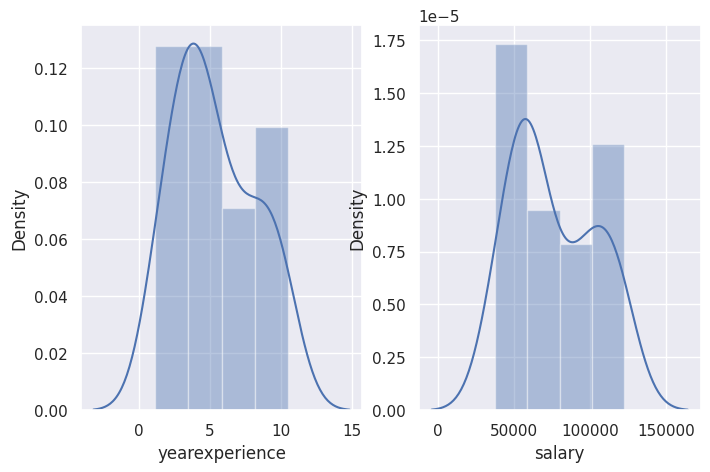

In [93]:
fig,axes=plt.subplots(1,2)
sns.set(rc={"figure.figsize": (8, 5)})
sns.distplot(df['yearexperience'],ax=axes[0])
sns.distplot(df['salary'],ax=axes[1])

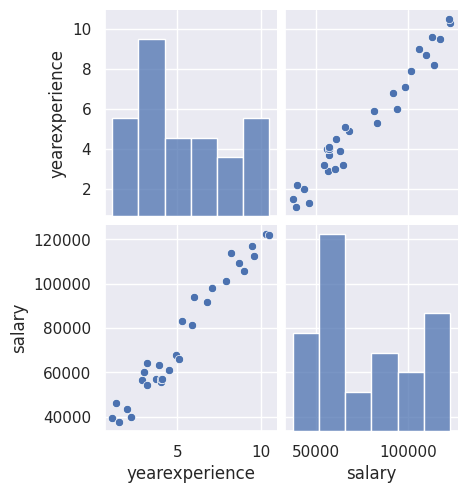

In [94]:
sns.pairplot(df)

In [95]:
df.corr()

,yearexperience,salary
yearexperience,1.000000,0.978242
salary,0.978242,1.000000


<Axes: xlabel='yearexperience', ylabel='salary'>

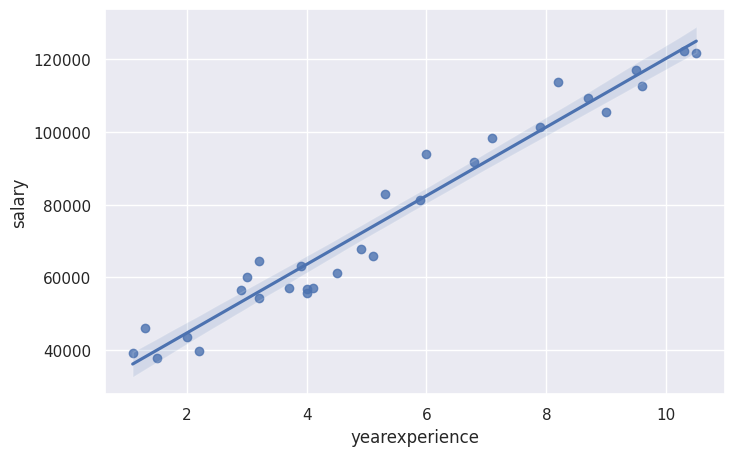

In [96]:
sns.regplot(x=df['yearexperience'],y=df['salary'])

In [97]:
model=smf.ols('salary~yearexperience',data=df).fit()
model

In [98]:
model.params

Intercept         25792.200199
yearexperience     9449.962321
dtype: float64

In [99]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 08 May 2023   Prob (F-statistic):           1.14e-20
Time:                        14:55:11   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
yearexperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

model prediction


In [101]:
salary=  (25792.200199)+(9449.962321)*(df['yearexperience'])
salary

0      36187.158752
1      38077.151216
2      39967.143680
3      44692.124841
4      46582.117305
5      53197.090930
6      54142.087162
7      56032.079626
8      56032.079626
9      60757.060787
10     62647.053251
11     63592.049483
12     63592.049483
13     64537.045715
14     68317.030644
15     72097.015572
16     73987.008036
17     75877.000500
18     81546.977893
19     82491.974125
20     90051.943982
21     92886.932678
22    100446.902535
23    103281.891231
24    108006.872392
25    110841.861088
26    115566.842249
27    116511.838481
28    123126.812105
29    125016.804570
Name: yearexperience, dtype: float64

In [109]:
salary=  (25792.200199)+(9449.962321)*3
salary

54142.087162

automatic prediction

In [103]:
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [106]:
data_pred=pd.DataFrame(new_data,columns=['yearexperience'])
data_pred

,yearexperience
0,3
1,5


In [108]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64